In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_csv("../data/titanic.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.Age.fillna(0,inplace=True)
df.Age = df.Age.astype(float)

<AxesSubplot:>

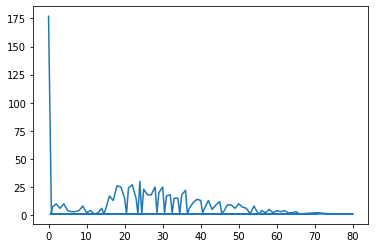

In [6]:
df.Age.sort_values().value_counts(sort=False).plot()

In [7]:
df[df.Age == 0.0].sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
87,88,0,3,"Slocovski, Mr. Selman Francis",male,0.0,0,0,SOTON/OQ 392086,8.0500,NaN,S
214,215,0,3,"Kiernan, Mr. Philip",male,0.0,1,0,367229,7.7500,NaN,Q
563,564,0,3,"Simmons, Mr. John",male,0.0,0,0,SOTON/OQ 392082,8.0500,NaN,S
464,465,0,3,"Maisner, Mr. Simon",male,0.0,0,0,A/S 2816,8.0500,NaN,S
411,412,0,3,"Hart, Mr. Henry",male,0.0,0,0,394140,6.8583,NaN,Q
470,471,0,3,"Keefe, Mr. Arthur",male,0.0,0,0,323592,7.2500,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,0.0,8,2,CA. 2343,69.5500,NaN,S
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,0.0,1,0,386525,16.1000,NaN,S
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,0.0,0,2,2668,22.3583,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,0.0,0,0,330959,7.8792,NaN,Q


<AxesSubplot:>

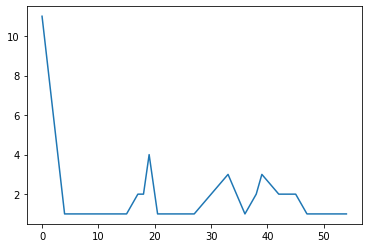

In [8]:
df.sample(50).Age.sort_values().value_counts(sort=False).plot()

In [9]:
ages = df.head(10).Age.tolist()
ages.sort()
ages

[0.0, 2.0, 14.0, 22.0, 26.0, 27.0, 35.0, 35.0, 38.0, 54.0]

In [10]:
cdf = df.head(10).Age.sort_values() / 10


In [11]:
# Frequency
stats_df = df.head(10) \
.groupby('Age') \
['Age'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'Age': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df

,Age,frequency,pdf,cdf
0,0.0,1,0.1,0.1
1,2.0,1,0.1,0.2
2,14.0,1,0.1,0.3
3,22.0,1,0.1,0.4
4,26.0,1,0.1,0.5
5,27.0,1,0.1,0.6
6,35.0,2,0.2,0.8
7,38.0,1,0.1,0.9
8,54.0,1,0.1,1.0


In [12]:
import numpy as np

In [13]:
np.cumsum(ages)

array([  0.,   2.,  16.,  38.,  64.,  91., 126., 161., 199., 253.])